In [1]:

#from pymongo import MongoClient
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import nltk
import re
#from tensorflow.keras import layers
#from tensorflow import keras
#import tensorflow as tf

from sklearn.model_selection import train_test_split

from ast import literal_eval

import matplotlib.pyplot as plt
import numpy as np

In [3]:
file_paths=["dblp-ref-0.json"]
# df = pd.DataFrame(list(cursor)) 
dfs = [pd.read_json(path, lines=True) for path in file_paths]
df = pd.concat(dfs, ignore_index=True)

# Show basic info
print(df.shape)

df.head()

(1000000, 8)


,abstract,authors,n_citation,references,title,venue,year,id
0,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,2013,00127ee2-cb05-48ce-bc49-9de556b93346
1,This paper describes the design and implementa...,"[Gareth Beale, Graeme Earl]",50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",A methodology for the physically accurate visu...,visual analytics science and technology,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821
2,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009,001c8744-73c4-4b04-9364-22d31a10dbf1
3,NaN,"[Jea-Bum Park, Byungmok Kim, Jian Shen, Sun-Yo...",0,"[8c78e4b0-632b-4293-b491-85b1976675e6, 9cdc54f...",Development of Remote Monitoring and Control D...,,2011,00338203-9eb3-40c5-9f31-cbac73a519ec
4,NaN,"[Giovanna Guerrini, Isabella Merlo]",2,NaN,Reasonig about Set-Oriented Methods in Object ...,,1998,0040b022-1472-4f70-a753-74832df65266


In [4]:
#df.to_csv("final_dataset.csv")

In [5]:
df=df[['id','title','abstract','authors','n_citation','year','references','venue']]

In [6]:
df.head()

,id,title,abstract,authors,n_citation,year,references,venue
0,00127ee2-cb05-48ce-bc49-9de556b93346,Preliminary Design of a Network Protocol Learn...,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",0,2013,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",international conference on human-computer int...
1,001c58d3-26ad-46b3-ab3a-c1e557d16821,A methodology for the physically accurate visu...,This paper describes the design and implementa...,"[Gareth Beale, Graeme Earl]",50,2011,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",visual analytics science and technology
2,001c8744-73c4-4b04-9364-22d31a10dbf1,"Comparison of GARCH, Neural Network and Suppor...",This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",50,2009,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...",pattern recognition and machine intelligence
3,00338203-9eb3-40c5-9f31-cbac73a519ec,Development of Remote Monitoring and Control D...,NaN,"[Jea-Bum Park, Byungmok Kim, Jian Shen, Sun-Yo...",0,2011,"[8c78e4b0-632b-4293-b491-85b1976675e6, 9cdc54f...",
4,0040b022-1472-4f70-a753-74832df65266,Reasonig about Set-Oriented Methods in Object ...,NaN,"[Giovanna Guerrini, Isabella Merlo]",2,1998,NaN,


In [7]:
df_null=df.copy()

In [8]:
df_null = df_null[
    df_null['references'].notna() & 
    (df_null['references'] != '') & 
    (df_null['references'].apply(lambda x: x != []))
]

In [9]:
df_null.isnull().sum()

id                 0
title              0
abstract      135293
authors            0
n_citation         0
year               0
references         0
venue              0
dtype: int64

In [10]:
df_null.dropna(inplace=True)

In [11]:
df_null.shape

(655479, 8)

In [12]:
df_null.drop_duplicates(subset=['id'], keep='first', inplace=True)
df_null.reset_index(drop= True,inplace = True)

In [13]:
#df_id=df_null[['id','title','abstract','n_citation','references']]
df_id = df_null[['id', 'title', 'abstract', 'n_citation', 'references']]#.sort_values(by='n_citation', ascending=False)
df_references=df_null[['id','references']]

In [14]:
df_id['original_title']=df_id['title']

C:\Users\GPR-03\AppData\Local\Temp\ipykernel_13396\3895716370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id['original_title']=df_id['title']


In [15]:
df_id.dtypes

id                object
title             object
abstract          object
n_citation         int64
references        object
original_title    object
dtype: object

In [ ]:
df_id=df_id.iloc[0:400].copy()
df_id

,id,title,abstract,n_citation,references,original_title
0,00127ee2-cb05-48ce-bc49-9de556b93346,Preliminary Design of a Network Protocol Learn...,The purpose of this study is to develop a lear...,0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...
1,001c58d3-26ad-46b3-ab3a-c1e557d16821,A methodology for the physically accurate visu...,This paper describes the design and implementa...,50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",A methodology for the physically accurate visu...
2,001c8744-73c4-4b04-9364-22d31a10dbf1,"Comparison of GARCH, Neural Network and Suppor...",This article applied GARCH model instead AR or...,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor..."
3,00a119c4-d367-4607-b3c8-b237f2971bff,Identifying Psychological Theme Words from Emo...,Recent achievements in Natural Language Proces...,0,"[84d47128-58d0-4187-aa44-389fde7d5c83, e0dce69...",Identifying Psychological Theme Words from Emo...
4,00c85316-bddf-4bcb-93f5-097adadd73c2,Relational Abstract Interpretation of Higher O...,Most applications of the abstract interpretati...,50,"[6e8a3ec3-9a99-4fac-ac4d-f8d1bf0fa208, 7bb71af...",Relational Abstract Interpretation of Higher O...
...,...,...,...,...,...,...
199995,88a30bbd-ee3f-4db1-9b3d-8cf9ba994d75,A robust classification method using combined ...,"In this paper, we present a robust data classi...",0,"[1bc8d22c-0918-4389-8e78-508e7927212a, 3ae9664...",A robust classification method using combined ...
199996,88a3ac95-387c-475b-a0df-58d2b0bfcaad,Grammar-based compression in a streaming model,"We show that, given a string s of length n, wi...",10,"[04d59cae-87b1-4706-9f5f-009ee3e94626, 0d09e1c...",Grammar-based compression in a streaming model
199997,88a3e696-8f13-4157-bd10-4b8c13fb3dea,Communication efficient statistical asynchrono...,We propose an efficient statistically secure a...,0,"[3c41ea57-2818-4699-b72a-99abe3bfd4b3, 4c7dee5...",Communication efficient statistical asynchrono...
199998,88a44942-c6ac-45ec-ba2e-12968a76eb40,Towards Aspectual Component-Based Development ...,"Increasing complexity of real-time systems, an...",50,"[15565957-b18e-4b5f-b821-988e23daba78, 1e82c5d...",Towards Aspectual Component-Based Development ...


In [17]:
df_id1=df_id.copy()

In [18]:
df_id.head()

,id,title,abstract,n_citation,references,original_title
0,00127ee2-cb05-48ce-bc49-9de556b93346,Preliminary Design of a Network Protocol Learn...,The purpose of this study is to develop a lear...,0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...
1,001c58d3-26ad-46b3-ab3a-c1e557d16821,A methodology for the physically accurate visu...,This paper describes the design and implementa...,50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",A methodology for the physically accurate visu...
2,001c8744-73c4-4b04-9364-22d31a10dbf1,"Comparison of GARCH, Neural Network and Suppor...",This article applied GARCH model instead AR or...,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor..."
3,00a119c4-d367-4607-b3c8-b237f2971bff,Identifying Psychological Theme Words from Emo...,Recent achievements in Natural Language Proces...,0,"[84d47128-58d0-4187-aa44-389fde7d5c83, e0dce69...",Identifying Psychological Theme Words from Emo...
4,00c85316-bddf-4bcb-93f5-097adadd73c2,Relational Abstract Interpretation of Higher O...,Most applications of the abstract interpretati...,50,"[6e8a3ec3-9a99-4fac-ac4d-f8d1bf0fa208, 7bb71af...",Relational Abstract Interpretation of Higher O...


## Preprocessing Steps for Natural Language Processing (NLP)
### Text Cleaning
#### I. Converting to lowercase

In [19]:
df_id = df_id.applymap(lambda x: x.lower() if isinstance(x, str) else x)

C:\Users\GPR-03\AppData\Local\Temp\ipykernel_13396\461851235.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_id = df_id.applymap(lambda x: x.lower() if isinstance(x, str) else x)


### II. Removing URLs

In [20]:

url_pattern = re.compile(r'https?://\S+')

# Define a function to remove URLs from text
def remove_urls(text):
    if isinstance(text, list):
        # Join list into a single string
        text = ' '.join(text)
    return url_pattern.sub('', text)

# Apply the function to the 'title' and 'abstract' columns and create new columns 'clean_title' and 'clean_abstract'
df_id['title'] = df_id['title'].apply(remove_urls)
df_id['abstract'] = df_id['abstract'].apply(remove_urls)

### III. Removing remove non-word and non-whitespace characters

In [21]:
df_id['title'] = df_id['title'].replace(to_replace=r'[^\w\s\b\d+]', value='', regex=True)
df_id['abstract'] = df_id['abstract'].replace(to_replace=r'[^\w\s\b\d+\b]', value='', regex=True)

### IV. Removing digits

In [22]:
df_id['title'] = df_id['title'].replace(to_replace=r'\d', value='', regex=True)
df_id['abstract'] = df_id['abstract'].replace(to_replace=r'\d', value='', regex=True)

## 2. Tokenization
#### Tokenization is the process of breaking down large blocks of text such as paragraphs and sentences into smaller, more manageable units.

In [23]:
df_id['title'] = df_id['title'].apply(word_tokenize)

In [24]:
df_id['abstract'] = df_id['abstract'].apply(word_tokenize)


## 3. Stopword Removal
#### Stopwords refer to the most commonly occurring words in any natural language.

In [25]:
stop_words = set(stopwords.words('english'))
df_id['title'] = df_id['title'].apply(lambda x: [word for word in x if word not in stop_words])
df_id['abstract'] = df_id['abstract'].apply(lambda x: [word for word in x if word not in stop_words])

## 4. Stemming/Lemmatization

In [26]:
nltk.download('wordnet')
nltk.download('punkt')  # Needed for word_tokenize
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GPR-03\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GPR-03\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\GPR-03\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [27]:

# from nltk.stem import WordNetLemmatizer
# # Initialize the lemmatizer
# lemmatizer = WordNetLemmatizer()

# # Apply lemmatization
# df_id['title'] = df_id['title'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
# df_id['abstract'] = df_id['abstract'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# # Now 'df_id['title']' and 'df_id['abstract']' have tokenized, stopword-removed, and lemmatized words


In [28]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Define a function to perform stemming on the 'text' column
def stem_words(words):
    return [stemmer.stem(word) for word in words]
# Apply the function to the 'text' column and create a new column 'stemmed_text'
df_id['title'] = df_id['title'].apply(stem_words)
df_id['abstract'] = df_id['abstract'].apply(stem_words)

In [29]:
#df_id=pd.read_csv("PreFile.csv")

In [30]:
df_id.head()

,id,title,abstract,n_citation,references,original_title
0,00127ee2-cb05-48ce-bc49-9de556b93346,"[preliminari, design, network, protocol, learn...","[purpos, studi, develop, learn, tool, high, sc...",0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",preliminary design of a network protocol learn...
1,001c58d3-26ad-46b3-ab3a-c1e557d16821,"[methodolog, physic, accur, visualis, roman, p...","[paper, describ, design, implement, methodolog...",50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",a methodology for the physically accurate visu...
2,001c8744-73c4-4b04-9364-22d31a10dbf1,"[comparison, garch, neural, network, support, ...","[articl, appli, garch, model, instead, ar, arm...",50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","comparison of garch, neural network and suppor..."
3,00a119c4-d367-4607-b3c8-b237f2971bff,"[identifi, psycholog, theme, word, emot, annot...","[recent, achiev, natur, languag, process, nlp,...",0,"[84d47128-58d0-4187-aa44-389fde7d5c83, e0dce69...",identifying psychological theme words from emo...
4,00c85316-bddf-4bcb-93f5-097adadd73c2,"[relat, abstract, interpret, higher, order, fu...","[applic, abstract, interpret, framework, foran...",50,"[6e8a3ec3-9a99-4fac-ac4d-f8d1bf0fa208, 7bb71af...",relational abstract interpretation of higher o...


In [31]:
import torch
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from scipy.spatial.distance import cosine
import chromadb
from chromadb.config import Settings
from sklearn.metrics import accuracy_score
import bert_score
import matplotlib.pyplot as plt

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the SciBERT model and tokenizer
model_name = "allenai/scibert_scivocab_uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to(device)  # Move model to GPU

# Function to get embeddings
def get_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512).to(device)  # Move inputs to GPU
    with torch.no_grad():
        embeddings = model(**inputs).last_hidden_state.mean(dim=1)  # Compute embeddings
    return embeddings.cpu()  # Move back to CPU for further processing

# Assume `df_id` is preloaded
df_id['title'] = df_id['title'].astype(str)
df_id['abstract'] = df_id['abstract'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

df_id['combined_text'] = df_id['title'] + " " + df_id['abstract']
df_id['text_embeddings'] = df_id['combined_text'].apply(lambda x: get_embeddings(x).squeeze().numpy().tolist())

# Connect to Chroma and create a collection
client = chromadb.Client(Settings())
text_collection = client.create_collection("text_embeddings")

# Prepare data for adding to the Chroma collection
ids = df_id["id"].tolist()
text_embeddings = df_id["text_embeddings"].tolist()
text_metadatas = df_id[["title", "abstract"]].to_dict(orient="records")

# Function to split a list into smaller chunks
def split_into_batches(data, batch_size):
    for i in range(0, len(data), batch_size):
        yield data[i:i + batch_size]

# Set batch size
batch_size = 166

# Split the ids, embeddings, and metadata into smaller batches
id_batches = list(split_into_batches(ids, batch_size))
embedding_batches = list(split_into_batches(text_embeddings, batch_size))
metadata_batches = list(split_into_batches(text_metadatas, batch_size))

# Add each batch to the Chroma collection
for id_batch, embedding_batch, metadata_batch in zip(id_batches, embedding_batches, metadata_batches):
    text_collection.add(ids=id_batch, embeddings=embedding_batch, metadatas=metadata_batch)

print("Embeddings added successfully in batches.")

# Function to compute similarity using Jaccard similarity
def compute_jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Function to find similar texts using Jaccard similarity
def find_similar_texts_jaccard(user_input, input_paper_id, top_n=5):
    user_embedding = set(user_input.split())
    
    similarities = []
    for idx, row in df_id.iterrows():
        if row['id'] != input_paper_id:  # Exclude the input paper
            text_embedding_set = set(row['combined_text'].split())
            sim = compute_jaccard_similarity(user_embedding, text_embedding_set)
            similarities.append((row['id'], sim))
    
    # Sort by similarity and get top N results
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:top_n]

# Function for re-ranking the results
def re_rank_results(similar_texts):
    return similar_texts  # Placeholder for re-ranking logic if needed

# Function to find and re-rank similar texts
def find_and_rerank_similar_texts(user_input, input_paper_id, top_n=5):
    similar_texts = find_similar_texts_jaccard(user_input, input_paper_id, top_n)
    re_ranked_texts = re_rank_results(similar_texts)
    return re_ranked_texts

# Function to recommend papers, excluding the input paper itself
def recommend_papers(user_input, input_paper_id, top_n=5):
    re_ranked_texts = find_and_rerank_similar_texts(user_input, input_paper_id, top_n)
    return re_ranked_texts

# BERTScore-based function for evaluating precision, recall, F1-score
def evaluate_bertscore(user_input, recommended_texts):
    references = [user_input] * len(recommended_texts)  # The user input is the reference text
    candidates = [text for _, text in recommended_texts]  # The recommended paper texts are the candidates
    
    P, R, F1 = bert_score.score(candidates, references, model_type=model_name, lang="en", device=device, rescale_with_baseline=True)
    
    precision = P.mean().item()
    recall = R.mean().item()
    f1_score = F1.mean().item()
    
    return precision, recall, f1_score

# Function to recommend and evaluate papers with BERTScore
def recommend_and_evaluate(user_input, input_paper_id, top_n=5):
    recommended_papers = recommend_papers(user_input, input_paper_id, top_n)
    recommended_texts = [(paper_id, df_id[df_id["id"] == paper_id]["combined_text"].values[0]) for paper_id, sim in recommended_papers]
    
    precision, recall, f1 = evaluate_bertscore(user_input, recommended_texts)
    accuracy = (precision + recall) / 2  # Simple proxy for now
    
    return precision, recall, f1, accuracy

# Example user input and input paper ID
user_input = "A methodology for the physically accurate visualisation of roman polychrome statuary"
input_paper_title = user_input.strip().lower()
input_paper_id = df_id[df_id['title'].str.strip().str.lower() == input_paper_title]['id'].values[0]

# Top-N values to evaluate
top_n_values = [50,100]

# Dictionary to store results
results = {
    "Top-N": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": []
}

# Run evaluations for each top-N value
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Updated function to plot metrics for different Top-N values as bar charts
def plot_metrics_for_top_n(results_df):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    plt.figure(figsize=(12, 8))
    
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', 
                     ha='center', va='bottom') 
    
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()
   
# Call the updated function to plot metrics
plot_metrics_for_top_n(results_df)


c:\Users\GPR-03\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cpu
Embeddings added successfully in batches.


IndexError: index 0 is out of bounds for axis 0 with size 0

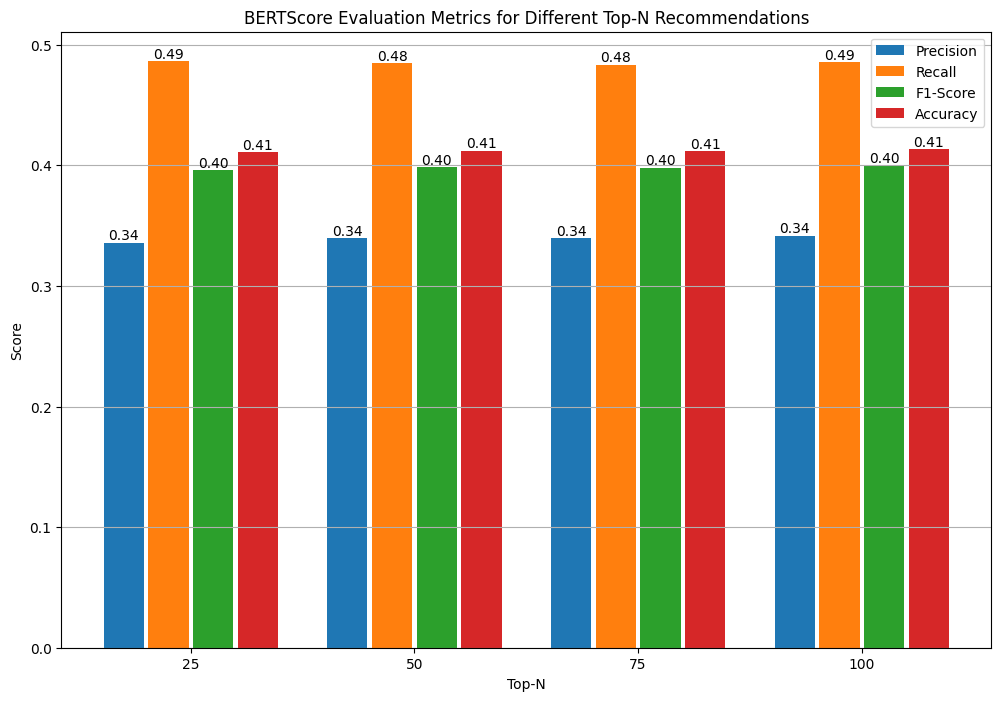

In [39]:
# Example user input and input paper ID
user_input = "A Question-Answering System Using Unit Estimation and Probabilistic Near-Terms IR"
input_paper_title = user_input.strip().lower()  # Example input paper title
input_paper_id = df_id[df_id['original_title'].str.strip().str.lower() == input_paper_title]['id'].values[0]  # Get input paper ID based on title

# Top-N values to evaluate
top_n_values = [25, 50, 75, 100]

# Dictionary to store results
results = {
    "Top-N": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": []
}

# Run evaluations for each top-N value
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    
    # Store results
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Updated function to plot metrics for different Top-N values as bar charts with values showing up to 2 decimal places
def plot_metrics_for_top_n(results_df):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    plt.figure(figsize=(12, 8))
    
    # Setting reduced width for the bars to create more space between them
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    # Adjust each metric to create slight space between the bars
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        
        # Add the values on top of each bar, formatted to 2 decimal places
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', 
                     ha='center', va='bottom')  # Display values with 2 decimal places
    
    # Setting the x-ticks in the middle of the bars
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Call the updated function to plot metrics for different Top-N values with 2 decimal places on top of the bars
plot_metrics_for_top_n(results_df)


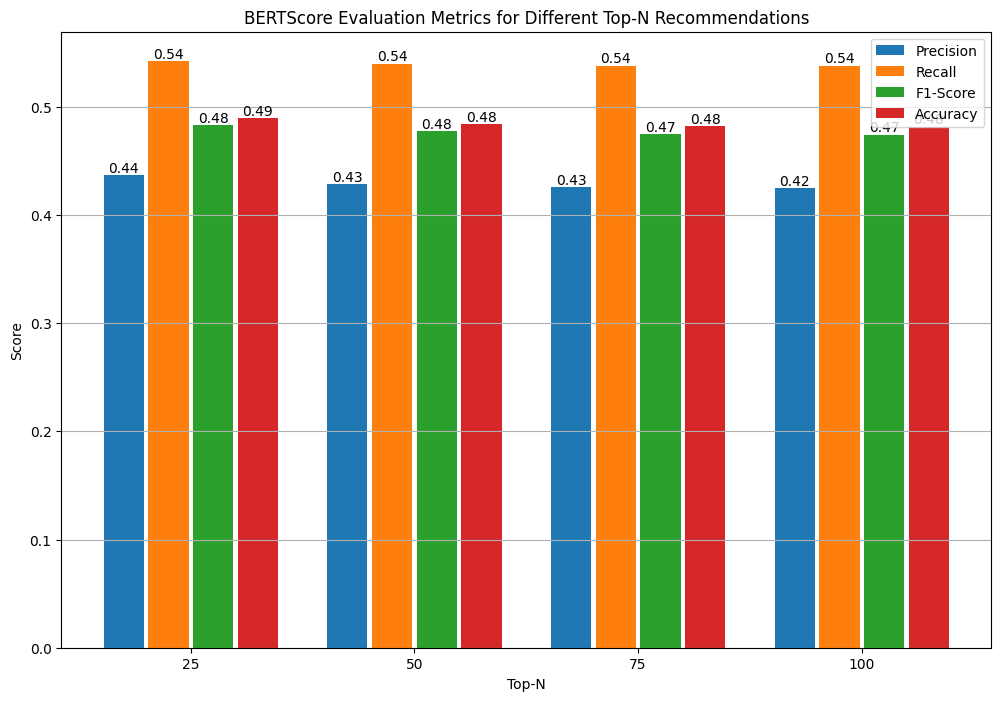

In [33]:
# Example user input and input paper ID
user_input = "Framework for quantitatively evaluating the quality requirements of software system"
input_paper_title = user_input.strip().lower()  # Example input paper title
input_paper_id = df_id[df_id['original_title'].str.strip().str.lower() == input_paper_title]['id'].values[0]  # Get input paper ID based on title

# Top-N values to evaluate
top_n_values = [25, 50, 75, 100]

# Dictionary to store results
results = {
    "Top-N": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": []
}

# Run evaluations for each top-N value
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    
    # Store results
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Updated function to plot metrics for different Top-N values as bar charts with values showing up to 2 decimal places
def plot_metrics_for_top_n(results_df):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    plt.figure(figsize=(12, 8))
    
    # Setting reduced width for the bars to create more space between them
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    # Adjust each metric to create slight space between the bars
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        
        # Add the values on top of each bar, formatted to 2 decimal places
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', 
                     ha='center', va='bottom')  # Display values with 2 decimal places
    
    # Setting the x-ticks in the middle of the bars
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Call the updated function to plot metrics for different Top-N values with 2 decimal places on top of the bars
plot_metrics_for_top_n(results_df)


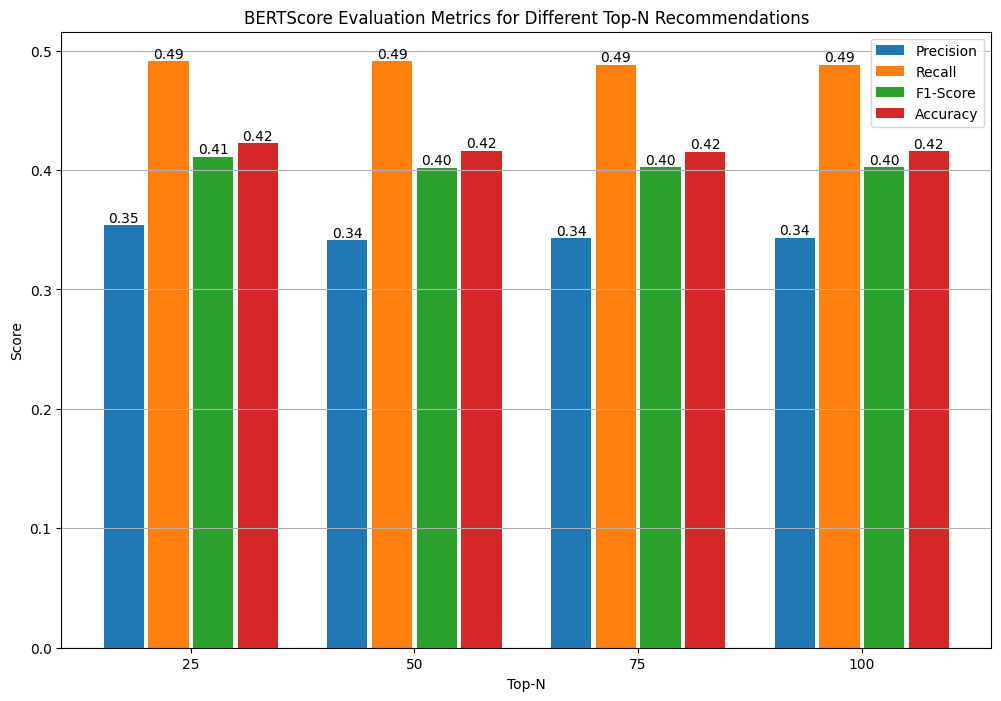

In [34]:
# Example user input and input paper ID
user_input = "Experimental Evaluation of a Process Benchmarking Tool in a Green Business Process Management Context"
input_paper_title = user_input.strip().lower()  # Example input paper title
input_paper_id = df_id[df_id['original_title'].str.strip().str.lower() == input_paper_title]['id'].values[0]  # Get input paper ID based on title

# Top-N values to evaluate
top_n_values = [25, 50, 75, 100]

# Dictionary to store results
results = {
    "Top-N": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": []
}

# Run evaluations for each top-N value
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    
    # Store results
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Updated function to plot metrics for different Top-N values as bar charts with values showing up to 2 decimal places
def plot_metrics_for_top_n(results_df):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    plt.figure(figsize=(12, 8))
    
    # Setting reduced width for the bars to create more space between them
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    # Adjust each metric to create slight space between the bars
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        
        # Add the values on top of each bar, formatted to 2 decimal places
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', 
                     ha='center', va='bottom')  # Display values with 2 decimal places
    
    # Setting the x-ticks in the middle of the bars
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Call the updated function to plot metrics for different Top-N values with 2 decimal places on top of the bars
plot_metrics_for_top_n(results_df)


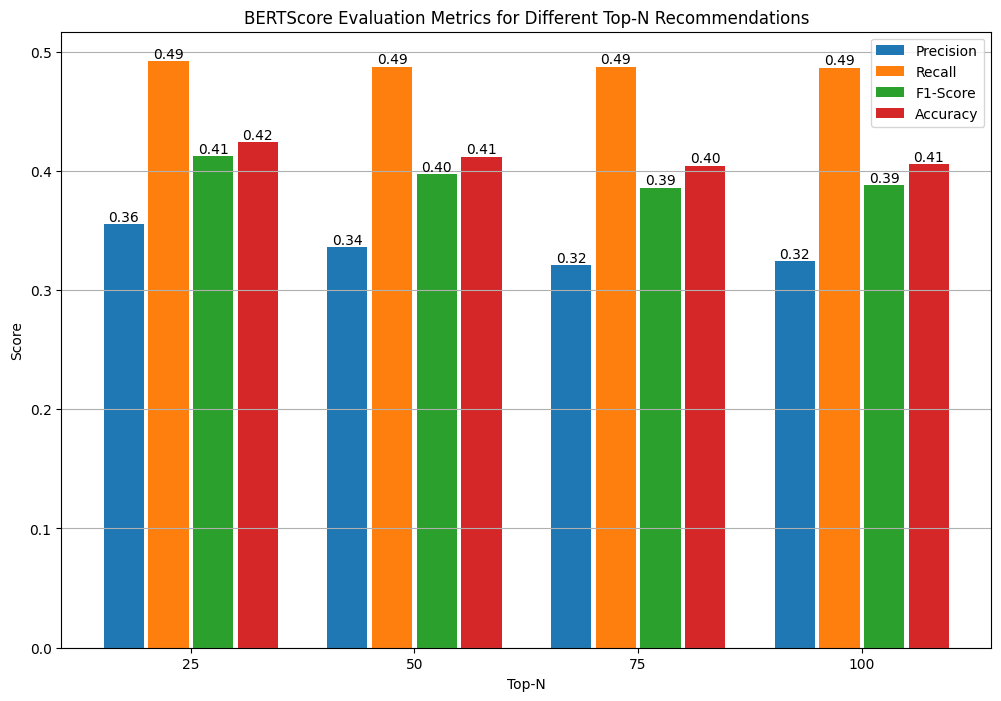

In [35]:
# Example user input and input paper ID
user_input = "The Role of Gender and Age on User Preferences in Narrative Experiences"
input_paper_title = user_input.strip().lower()  # Example input paper title
input_paper_id = df_id[df_id['original_title'].str.strip().str.lower() == input_paper_title]['id'].values[0]  # Get input paper ID based on title

# Top-N values to evaluate
top_n_values = [25, 50, 75, 100]

# Dictionary to store results
results = {
    "Top-N": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": []
}

# Run evaluations for each top-N value
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    
    # Store results
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Updated function to plot metrics for different Top-N values as bar charts with values showing up to 2 decimal places
def plot_metrics_for_top_n(results_df):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    plt.figure(figsize=(12, 8))
    
    # Setting reduced width for the bars to create more space between them
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    # Adjust each metric to create slight space between the bars
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        
        # Add the values on top of each bar, formatted to 2 decimal places
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', 
                     ha='center', va='bottom')  # Display values with 2 decimal places
    
    # Setting the x-ticks in the middle of the bars
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Call the updated function to plot metrics for different Top-N values with 2 decimal places on top of the bars
plot_metrics_for_top_n(results_df)


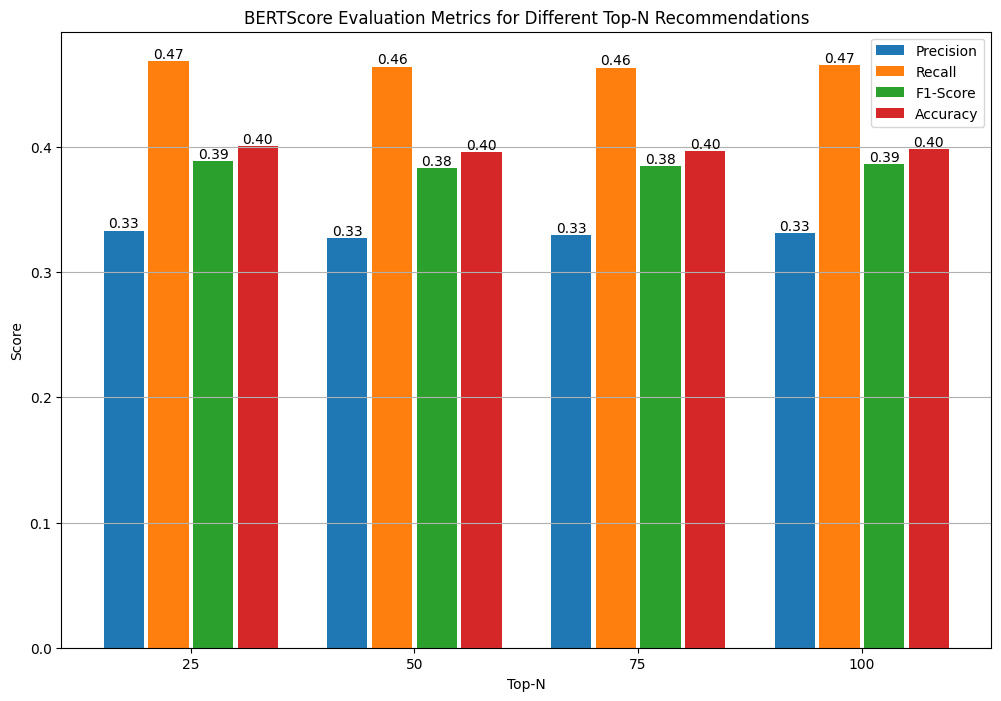

In [36]:
# Example user input and input paper ID
user_input = "Optimal Feedback for Quality Source-Adaptive Schemes in Multicast Multi-layered Video Environments"
input_paper_title = user_input.strip().lower()  # Example input paper title
input_paper_id = df_id[df_id['original_title'].str.strip().str.lower() == input_paper_title]['id'].values[0]  # Get input paper ID based on title

# Top-N values to evaluate
top_n_values = [25, 50, 75, 100]

# Dictionary to store results
results = {
    "Top-N": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": []
}

# Run evaluations for each top-N value
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    
    # Store results
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Updated function to plot metrics for different Top-N values as bar charts with values showing up to 2 decimal places
def plot_metrics_for_top_n(results_df):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    plt.figure(figsize=(12, 8))
    
    # Setting reduced width for the bars to create more space between them
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    # Adjust each metric to create slight space between the bars
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        
        # Add the values on top of each bar, formatted to 2 decimal places
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', 
                     ha='center', va='bottom')  # Display values with 2 decimal places
    
    # Setting the x-ticks in the middle of the bars
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Call the updated function to plot metrics for different Top-N values with 2 decimal places on top of the bars
plot_metrics_for_top_n(results_df)


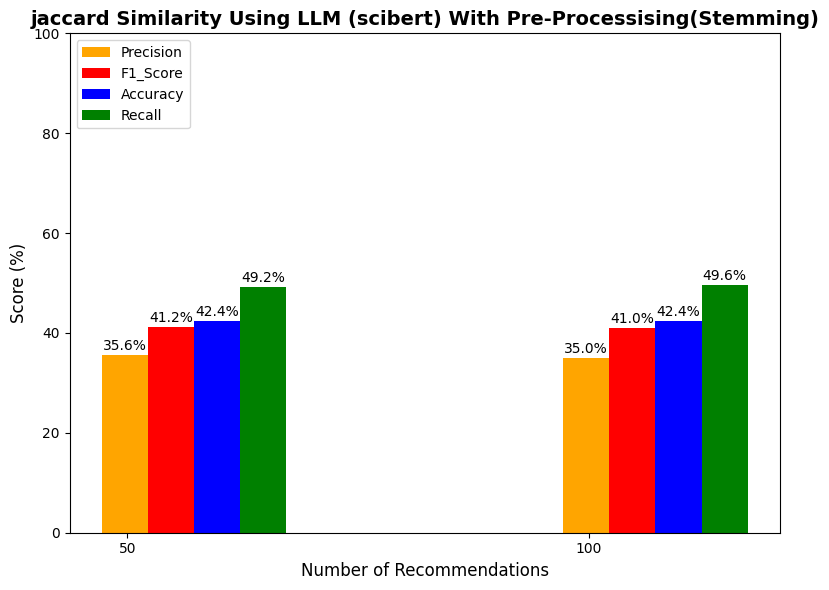

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Input data
results = {
    'Recommendations': [ 50,100],
    'Accuracy': [
        [0.40, 0.41, 0.42, 0.48, 0.41],
        [0.40, 0.41, 0.42, 0.48, 0.41]
        
    ],
    'Precision': [
        [0.33, 0.34, 0.34, 0.43, 0.34],
        [0.33, 0.32, 0.34, 0.42, 0.34]
        
    ],
    'Recall': [
        [0.46, 0.49, 0.49, 0.54, 0.48],
        [0.47, 0.49, 0.49, 0.54, 0.49]
        
    ],
    'F1_Score': [
        [0.38, 0.40, 0.40, 0.48, 0.40],
        [0.39, 0.39, 0.40, 0.47, 0.40]
    ]
}
# Compute averages for each metric at each recommendation level and convert to percentages
averaged_results = {metric: [np.mean(values) * 100 for values in metrics] for metric, metrics in results.items() if metric != 'Recommendations'}

# Define colors and order
metrics_order = ['Precision', 'F1_Score', 'Accuracy', 'Recall']
colors = {'Accuracy': 'blue', 'Precision': 'orange', 'Recall': 'green', 'F1_Score': 'red'}

# Plotting the bars
fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(len(results['Recommendations']))
width = 0.1  # Width of each bar

# Plot bars for each recommendation level
for i, rec in enumerate(results['Recommendations']):
    for j, metric in enumerate(metrics_order):
        value = averaged_results[metric][i]
        bar = ax.bar(x[i] + j * width, value, width, label=metric if i == 0 else "", color=colors[metric])

        # Add labels above each bar
        ax.text(x[i] + j * width, value + 1, f"{value:.1f}%", ha='center', fontsize=10)

# Set x-axis labels and title
ax.set_xticks(x + width * 0.05)
ax.set_xticklabels(results['Recommendations'])
ax.set_xlabel("Number of Recommendations", fontsize=12)
ax.set_ylabel("Score (%)", fontsize=12)
ax.set_title("jaccard Similarity Using LLM (scibert) With Pre-Processising(Stemming)", fontsize=14, fontweight='bold')

# Set y-axis scale from 0 to 100
ax.set_ylim(0, 100)

# Improve legend display
ax.legend(fontsize=10, loc="upper left")

plt.tight_layout()
plt.show()


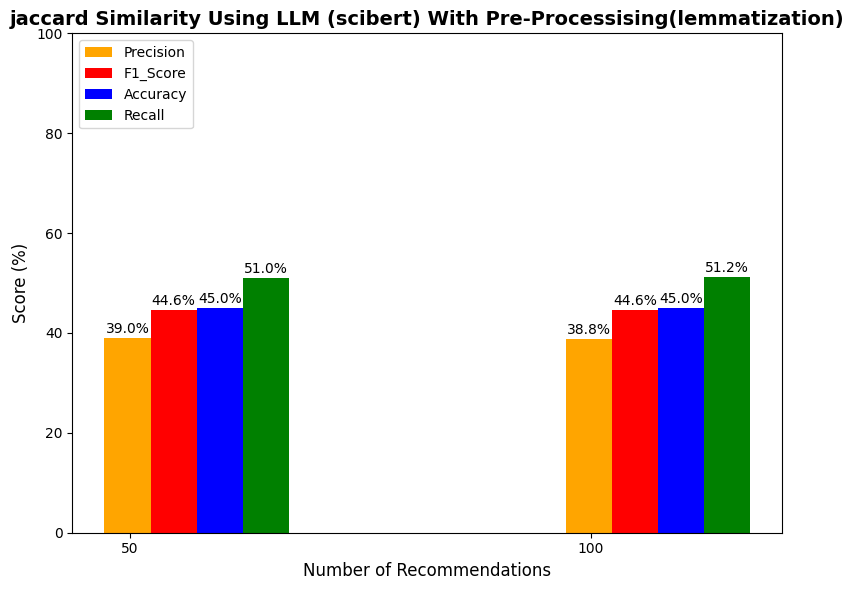

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Input data
results = {
    'Recommendations': [ 50,100],
    'Accuracy': [
        [0.46, 0.50, 0.44, 0.43, 0.42],
        [0.46, 0.50, 0.44, 0.43, 0.42]
        
    ],
    'Precision': [
        [0.40, 0.44, 0.38, 0.36, 0.37],
        [0.40, 0.43, 0.38, 0.36, 0.37]
        
    ],
    'Recall': [
        [0.52, 0.56, 0.50, 0.49, 0.48],
        [0.53, 0.56, 0.50, 0.49, 0.48]
        
    ],
    'F1_Score': [
        [0.46, 0.49, 0.44, 0.42, 0.42],
        [0.46, 0.49, 0.44, 0.42, 0.42]
    ]
}
# Compute averages for each metric at each recommendation level and convert to percentages
averaged_results = {metric: [np.mean(values) * 100 for values in metrics] for metric, metrics in results.items() if metric != 'Recommendations'}

# Define colors and order
metrics_order = ['Precision', 'F1_Score', 'Accuracy', 'Recall']
colors = {'Accuracy': 'blue', 'Precision': 'orange', 'Recall': 'green', 'F1_Score': 'red'}

# Plotting the bars
fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(len(results['Recommendations']))
width = 0.1  # Width of each bar

# Plot bars for each recommendation level
for i, rec in enumerate(results['Recommendations']):
    for j, metric in enumerate(metrics_order):
        value = averaged_results[metric][i]
        bar = ax.bar(x[i] + j * width, value, width, label=metric if i == 0 else "", color=colors[metric])

        # Add labels above each bar
        ax.text(x[i] + j * width, value + 1, f"{value:.1f}%", ha='center', fontsize=10)

# Set x-axis labels and title
ax.set_xticks(x + width * 0.05)
ax.set_xticklabels(results['Recommendations'])
ax.set_xlabel("Number of Recommendations", fontsize=12)
ax.set_ylabel("Score (%)", fontsize=12)
ax.set_title("jaccard Similarity Using LLM (scibert) With Pre-Processising(lemmatization)", fontsize=14, fontweight='bold')

# Set y-axis scale from 0 to 100
ax.set_ylim(0, 100)

# Improve legend display
ax.legend(fontsize=10, loc="upper left")

plt.tight_layout()
plt.show()
